# Forecast the CocaCola prices

In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 38.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 115.7 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [ ]:
from pmdarima import auto_arima

In [ ]:
import pandas as pd
from datetime import date, timedelta
import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import numpy as np

In [ ]:
coco = pd.read_excel('CocaCola_Sales_Rawdata.xlsx')
coco

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [ ]:
import plotly.express as px

In [ ]:
figure = px.line(coco, x="Quarter", 
                 y="Sales", 
                 title='Quarterly Sales')
figure.show()

<AxesSubplot:>

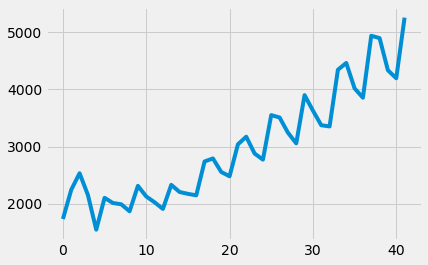

In [ ]:
coco.Sales.plot()

In [ ]:
coco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [ ]:
quarter=['Q1','Q2','Q3','Q4']
n=coco['Quarter'][0]
n[0:2]

'Q1'

In [ ]:
coco['quarter']=0
for i in range(42):
    n=coco['Quarter'][i]
    coco['quarter'][i]=n[0:2]
    dummy=pd.DataFrame(pd.get_dummies(coco['quarter']))
    data1=pd.concat((coco,dummy),axis=1)
t= np.arange(1,43)
data1['t']=t
data1['t_square']=data1['t']*data1['t']
log_Sales=np.log(data1['Sales'])
data1['log_Sales']=log_Sales

<ipython-input-12-60d571198957>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
data1

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602
5,Q2_87,2104.411995,Q2,0,1,0,0,6,36,7.651791
6,Q3_87,2014.362999,Q3,0,0,1,0,7,49,7.608058
7,Q4_87,1991.746998,Q4,0,0,0,1,8,64,7.596767
8,Q1_88,1869.049999,Q1,1,0,0,0,9,81,7.533186
9,Q2_88,2313.631996,Q2,0,1,0,0,10,100,7.746574


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data1['quarter']= le.fit_transform(data1['quarter'])
data1['quarter']=data1['quarter']+1 
coco = data1

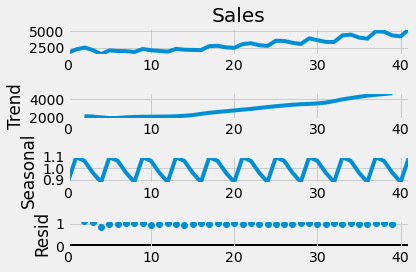

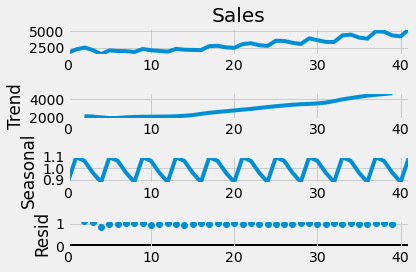

In [ ]:
result = seasonal_decompose(coco['Sales'], model ='multiplicative',period= 4)
result.plot()

In [ ]:
stepwise_fit = auto_arima(coco['Sales'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 3, 
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   
                          suppress_warnings = True,  
                          stepwise = True)
     

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[3]             : AIC=inf, Time=0.31 sec
 ARIMA(0,1,0)(0,1,0)[3]             : AIC=600.643, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[3]             : AIC=599.807, Time=0.13 sec
 ARIMA(0,1,1)(0,1,1)[3]             : AIC=inf, Time=0.09 sec
 ARIMA(1,1,0)(0,1,0)[3]             : AIC=599.868, Time=0.04 sec
 ARIMA(1,1,0)(2,1,0)[3]             : AIC=573.022, Time=0.16 sec
 ARIMA(1,1,0)(2,1,1)[3]             : AIC=560.959, Time=0.21 sec
 ARIMA(1,1,0)(1,1,1)[3]             : AIC=inf, Time=0.10 sec
 ARIMA(1,1,0)(2,1,2)[3]             : AIC=556.216, Time=0.35 sec
 ARIMA(1,1,0)(1,1,2)[3]             : AIC=inf, Time=0.33 sec
 ARIMA(0,1,0)(2,1,2)[3]             : AIC=inf, Time=0.24 sec
 ARIMA(2,1,0)(2,1,2)[3]             : AIC=inf, Time=0.75 sec
 ARIMA(1,1,1)(2,1,2)[3]             : AIC=557.526, Time=0.37 sec
 ARIMA(0,1,1)(2,1,2)[3]             : AIC=inf, Time=0.20 sec
 ARIMA(2,1,1)(2,1,2)[3]             : AIC=inf, Time=0.39 sec
 ARIMA(1,1,0)(

In [ ]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                      y   No. Observations:                   42
Model:             SARIMAX(1, 1, 0)x(2, 1, [1, 2], 3)   Log Likelihood                -272.108
Date:                                Wed, 01 Mar 2023   AIC                            556.216
Time:                                        13:25:47   BIC                            566.042
Sample:                                             0   HQIC                           559.712
                                                 - 42                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4396      0.178     -2.464      0.014      -0.789      -0.090
ar.S.L3        0.0108      0.189      0.057      0.954      -0.359       0.381
ar.S.L6       -0.8851      0.072    -12.305      0.000      -1.026      -0.744
ma.S.L3       -1.2296      0.197     -6.256      0.000      -1.615      -0.844
ma.S.L6        0.6308      0.272      2.317      0.020       0.097       1.164
sigma2      6.516e+04   2.37e+04      2.752      0.006    1.87e+04    1.12e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.25   Jarque-Bera (JB):                 0.50
Prob(Q):                              0.62   Prob(JB):                         0.78
Heteroskedasticity (H):               0.99   Skew:                            -0.11
Prob(H) (two-sided):                  0.99   Kurtosis:                         2.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
train = coco.iloc[:len(coco)-4]
test = coco.iloc[len(coco)-4:]

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
model = SARIMAX(train['Sales'],order = (1, 1, 0), seasonal_order =(2, 1, [1, 2], 3))
result = model.fit()
result.summary()
 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                  Sales   No. Observations:                   38
Model:             SARIMAX(1, 1, 0)x(2, 1, [1, 2], 3)   Log Likelihood                -245.360
Date:                                Wed, 01 Mar 2023   AIC                            502.719
Time:                                        13:29:21   BIC                            511.877
Sample:                                             0   HQIC                           505.842
                                                 - 38                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4225      0.211     -2.004      0.045      -0.836      -0.009
ar.S.L3        0.0352      0.220      0.160      0.873      -0.396       0.466
ar.S.L6       -0.8488      0.095     -8.929      0.000      -1.035      -0.662
ma.S.L3       -1.2617      0.232     -5.435      0.000      -1.717      -0.807
ma.S.L6        0.6243      0.311      2.006      0.045       0.014       1.234
sigma2      7.273e+04   2.94e+04      2.475      0.013    1.51e+04     1.3e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.24   Jarque-Bera (JB):                 0.42
Prob(Q):                              0.62   Prob(JB):                         0.81
Heteroskedasticity (H):               0.95   Skew:                            -0.06
Prob(H) (two-sided):                  0.94   Kurtosis:                         2.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
start = len(train)
end = len(train) + len(test) - 1
    

In [ ]:
predictions = result.predict(start, end, typ = 'levels').rename("Predictions")
 

<AxesSubplot:>

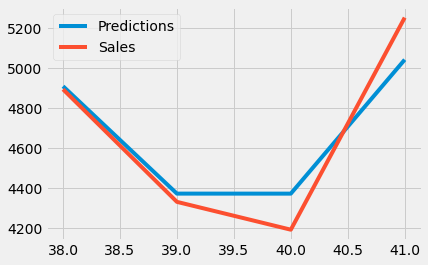

In [ ]:
predictions.plot(legend = True)
test['Sales'].plot(legend = True)
  

In [ ]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
     

In [ ]:
rmse(test["Sales"], predictions)

140.05087755214893

In [ ]:
model = SARIMAX(coco['Sales'],order = (1, 1, 0), seasonal_order =(2, 1, [1, 2], 3))
     


In [ ]:
result = model.fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [ ]:
forecast = result.predict(start = len(coco), 
                          end = (len(coco)-1) + 5 * 4, 
                          typ = 'levels').rename('Forecast')
     

<AxesSubplot:>

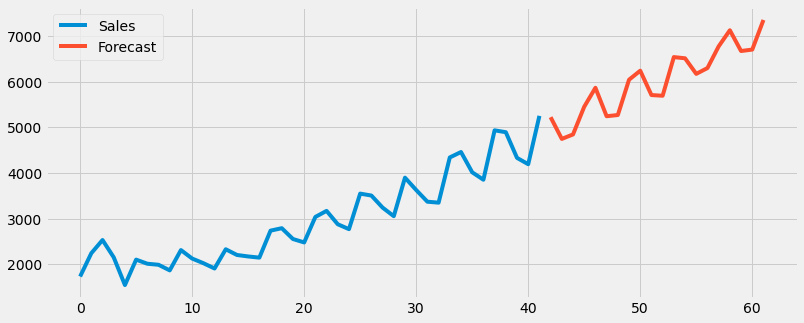

In [ ]:
coco['Sales'].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)
     

# Forecast the  Airlines Passengers data set

In [1]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 37.2 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [3]:
from pmdarima import auto_arima
     

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


In [4]:
airline = pd.read_excel('Airlines+Data.xlsx',index_col ='Month',parse_dates = True)

In [5]:
airline

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


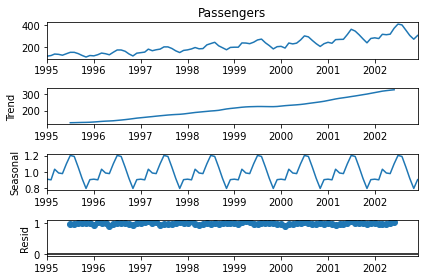

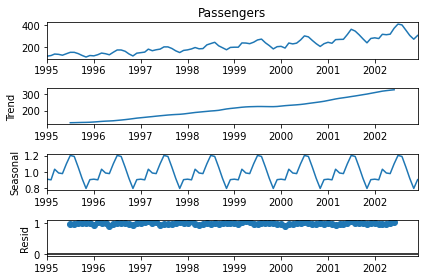

In [6]:
result = seasonal_decompose(airline['Passengers'], model ='multiplicative')
result.plot()
     

In [7]:
stepwise_fit = auto_arima(airline['Passengers'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   
                          suppress_warnings = True,  
                          stepwise = True)
     

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=618.049, Time=0.67 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=622.012, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=615.965, Time=0.21 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=616.628, Time=0.34 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=618.192, Time=0.10 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=617.814, Time=0.56 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=617.881, Time=0.55 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=616.531, Time=0.71 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=2.43 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=618.221, Time=0.19 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=617.862, Time=0.31 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=617.462, Time=0.41 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=616.076, Time=0.28 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=619.394, Time=0.79 sec
 ARIMA(1,1,0)(1,1,0)[12] intercept   

In [8]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   96
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -304.983
Date:                            Thu, 02 Mar 2023   AIC                            615.965
Time:                                    04:22:21   BIC                            623.222
Sample:                                01-01-1995   HQIC                           618.881
                                     - 12-01-2002                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2250      0.099     -2.276      0.023      -0.419      -0.031
ar.S.L12      -0.2274      0.089     -2.548      0.011      -0.402      -0.052
sigma2        90.2700     14.667      6.155      0.000      61.524     119.016
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.23
Prob(Q):                              0.97   Prob(JB):                         0.33
Heteroskedasticity (H):               1.77   Skew:                             0.39
Prob(H) (two-sided):                  0.14   Kurtosis:                         2.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [9]:
train = airline.iloc[:len(airline)-12]
test = airline.iloc[len(airline)-12:]

In [10]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
     

In [11]:
model = SARIMAX(train['Passengers'],order = (1, 1, 0), seasonal_order =(1, 1, 0, 12))
     

In [12]:
result = model.fit()
result.summary()
     


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         Passengers   No. Observations:                   84
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -262.555
Date:                            Thu, 02 Mar 2023   AIC                            531.110
Time:                                    04:23:32   BIC                            537.898
Sample:                                01-01-1995   HQIC                           533.810
                                     - 12-01-2001                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2377      0.108     -2.204      0.028      -0.449      -0.026
ar.S.L12      -0.2595      0.097     -2.685      0.007      -0.449      -0.070
sigma2        94.2022     16.779      5.614      0.000      61.315     127.089
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.31
Prob(Q):                              0.98   Prob(JB):                         0.32
Heteroskedasticity (H):               2.60   Skew:                             0.41
Prob(H) (two-sided):                  0.02   Kurtosis:                         2.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
start = len(train)
end = len(train) + len(test) - 1
     

In [14]:
predictions = result.predict(start, end, typ = 'levels').rename("Predictions")
     

<AxesSubplot:xlabel='Month'>

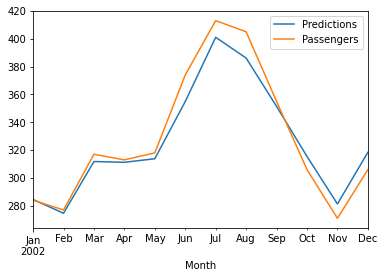

In [15]:
predictions.plot(legend = True)
test['Passengers'].plot(legend = True)
     

In [16]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
     

In [17]:
rmse(test["Passengers"], predictions)
 

10.331675977607135

In [18]:
model = model = SARIMAX(airline['Passengers'], 
                        order = (1, 1, 0), 
                        seasonal_order =(1, 1, 0, 12))
     

In [19]:
result = model.fit()

In [20]:
forecast = result.predict(start = len(airline), 
                          end = (len(airline)-1) + 5 * 12, 
                          typ = 'levels').rename('Forecast')
     

<AxesSubplot:xlabel='Month'>

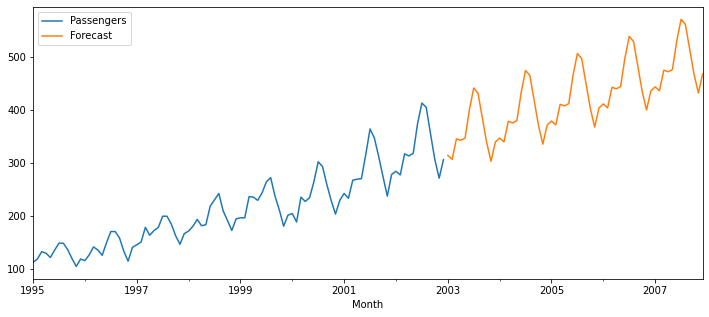

In [21]:
airline['Passengers'].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)
     